# Homework 4 - Manifold Learning

This is an individual assignment.

**Due: Friday, April 3, 11:59 PM**

## Grading Rubric

1. **Problem 1 (60 pts)**
    * Code implementation of MDS (20 pts)
    * Code implementation of ISOMAP (20 pts)
    * Code implementation of LLE (20 pts)
    
2. **Problem 2 (40 pts)** 
    * You've used your code to projected all provided data sets to 2-D and provided the appropriated discussions

**Total: 100 pts**

# Manifold Learning

In this assignment, you will explore manifold learning. You have been given 3 data sets with varying original dimensionality in each.

1. **Clusters Data Set:** (or "Gaussian clouds) this data set is 10-dimensional. **Goal:** It contains three groups of data that where each group should be classified into separate classes.

2. **Swiss Roll Data Set:** this data set is 3-dimensional. **Goal:** One group of data where neighboring points on the surface should remain neighbors after dimensionality reduction and points far on the surface should remain far from each other after dimensionality reduction.

3. **Half moons Data Set:** this data is 3-dimensional. **Goal:** Two groups of data that where each group should be classified into a separate class.

Here are the data sets:

Clusters Data Set: (600, 10)
Swissroll Data Set:  (500, 3)
Halfmoons Data Set:  (500, 3)


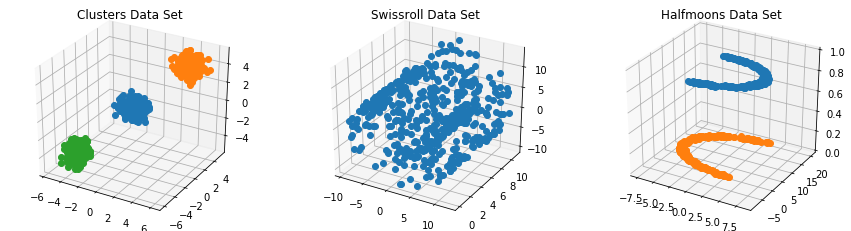

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from scipy.spatial.distance import pdist,squareform
from sklearn.neighbors import NearestNeighbors


fig = plt.figure(figsize=(15, 4))

#Load Clusters
clusters = np.loadtxt('clusters.txt') 
X1_labels = clusters[:,10] 
X1 = clusters[:,0:10]
print('Clusters Data Set:', X1.shape)
ax = fig.add_subplot(131, projection='3d')
for i in range(1,4):
    ax.plot3D(X1[X1_labels==i,0],X1[X1_labels==i,1], X1[X1_labels==i,2],'o');
plt.title('Clusters Data Set');

# Load Data Swissroll
X2 = np.loadtxt('swissroll.txt') 
print('Swissroll Data Set: ', X2.shape)
ax = fig.add_subplot(132, projection='3d')
ax.plot3D(X2[:,0],X2[:,1], X2[:,2],'o');
plt.title('Swissroll Data Set');

#Load Halfmoons
halfmoons = np.loadtxt('halfmoons.txt') 
X3_labels = halfmoons[:,3] 
X3 = halfmoons[:,0:3]
print('Halfmoons Data Set: ',X3.shape)
ax = fig.add_subplot(133, projection='3d')
for i in range(1,4):
    ax.plot3D(X3[X3_labels==i,0],X3[X3_labels==i,1], X3[X3_labels==i,2],'o');
plt.title('Halfmoons Data Set');

# Problem 1

Implement classic MDS, ISOMAP and LLE. 

You should implement these models from scratch. To aid you in this implementation, you can use the follwing functions:

* ```NearestNeighbors``` from the module ```sklearn.neighbors```. This will help in computing neighbors of points.
* ```pdist``` from ```scipy.spatial.distance```. This will help computing pairwise distances between points. 
* ```squareform``` from ```scipy.spatial.distance```. This will help converting the pairwise distances into a square matrix.
* ```numpy``` library (includes linear algebra modules).

## MDS

In [2]:
X1.shape

(600, 10)

In [3]:
X2.shape

(500, 3)

In [4]:
X3.shape

(500, 3)

In [5]:
def proximity_matrix(X):
    D = pdist( X ,'euclidean' )
    D = squareform(D)
    return D

def square_proximity_matrix(D):
    return D**2

def calculate_J(n):
    one= np.ones(n)
    one= np.asmatrix(one).T
    I= np.eye(n)
    J= I - (1.0/n)*(one@one.T)
    return J

def calculate_B(J,square_D):
    
    B= -0.5 *(J@(square_D)@J)
    return B
    
def calculate_Y(B):
    eigenValues, eigenVectors = np.linalg.eig(B)

    #Sort in decreasing order
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]


    l=np.diag(np.sqrt(eigenValues[:2]))

    Y=np.dot(l,np.transpose(eigenVectors[:,:2]))
    Y=np.transpose(Y)
    #print(Y.shape)
    return Y

def plot_Y_(Y,X_labels):
    for i in range(1,4):
        plt.scatter([Y[X_labels==i,0]], [Y[X_labels==i,1]])
        plt.axis('equal')
    return

def plot_Y(Y):
    plt.scatter([Y[:,0]], [Y[:,1]])
    plt.axis('equal')
    return

def MDS(X):
    
    # STEP 1 :
    # Proximity matrix of X
    
    D = proximity_matrix(X)
    
    # STEP 2 : 
    # Calculate the proximity matrix square
    
    square_D = square_proximity_matrix(D)
    
    # STEP 3:
    # Calculate J Matrix
    n = D.shape[0]
    J = calculate_J(n)
    
    # STEP 4:
    # Calculate B Matrix
    B = calculate_B(J, square_D)
    
    
    # STEP 5:
    # Calculate eigen vector and eigen values of B
    # Then calculate the projection Y
    Y = calculate_Y(B)
    
    return Y 

#I adopted the code for floyd warshall from the following link
#https://iq.opengenus.org/floyd-warshall-algorithm-shortest-path-between-all-pair-of-nodes/

def floyd_warshall(vertex, adjacency_matrix):
    # calculating all pair shortest path
    for k in range(0, vertex):
        for i in range(0, vertex):
            for j in range(0, vertex):
            # relax the distance from i to j by allowing vertex k as intermediate vertex
            # consider which one is better, going through vertex k or the previous value
                adjacency_matrix[i][j] = min(adjacency_matrix[i][j], adjacency_matrix[i][k] + adjacency_matrix[k][j])
    return adjacency_matrix
	# pretty print the graph

def ISOMAP(X,n_neighbors):
    # Create the graph of shortest distances from X to self.training_data_
    # via the nearest neighbors of X.
    # This can be done as a single array operation, but it potentially
    # takes a lot of memory.  To avoid that, use a loop:
    
    #find the nearest neighbor 
    nbrs = NearestNeighbors(n_neighbors, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)

    dist_matrix=proximity_matrix(X)
    
    dist_matrix2=proximity_matrix(X)
    
    #print("Indices", indices)
    #print("Distances", distances)
    
    #matrixD = np.zeros((X.shape[0], X.shape[0]))
    matrixD= np.full((X.shape[0],X.shape[0]), float(10**10))
    np.fill_diagonal(matrixD, 0)
    c=0
    
    for k in range(X.shape[0]):
        for i in range(len(indices[k])):
            matrixD[indices[k][0]][indices[k][i]]=distances[k][i]
            
    #for each in indices:
        #print("Index",each)
        #print("Index 0:",each[0])
        #print("Index 1:",each[1])
    #    for d in range(len(distances[0])):
    #        matrixD[each[0]][each[d]]=distances[c][d]
        #print("Index Updated:", matrixD[each])
    #    c=c+1
    #print (matrixD)
    #print(matrixD[599][514])

    
    
    # The following part under command is implemented 
    # similar to the transform function in the following link 
    
    # https://github.com/scikit-learn/scikit-learn/blob/95d4f0841/sklearn/manifold/_isomap.py#L16
    #G_X = np.zeros((X.shape[0], X.shape[0]))
    #for i in range(X.shape[0]):
        #print(indices[i])
    #    G_X[i] = np.min((dist_matrix[indices[i]]+ distances[i][:, None]), 0)
        #print("G_X i",G_X[i].shape)
    
    #G_X **= 2
    #G_X *= 0.5
    
    
    # We will call floyd warshall to calculate the distances between each data point. 
    
    #D_G=floyd_warshall(X.shape[0],dist_matrix2)
    D_G=floyd_warshall(X.shape[0],matrixD)
    #print("Distance Matrix D_G",D_G)
    G_X=D_G
    
    
    #print("Shape of G",G_X.shape)

    #print("Shape of X",X1.shape)

    #MDS
    square_G = square_proximity_matrix(G_X)

    # STEP 3:
    # Calculate J Matrix
    n = G_X.shape[0]
    J = calculate_J(n)

    # STEP 4:
    # Calculate B Matrix
    B = calculate_B(J, square_G)


    # STEP 5:
    # Calculate eigen vector and eigen values of B
    # Then calculate the projection Y
    Y = calculate_Y(B)

    #print(Y.shape)
    #plot_Y(Y)
    return Y
    
    
    
    
    

(600, 2)


/home/aysegulbumin/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


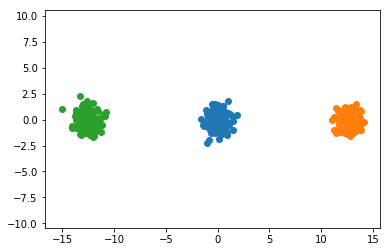

In [6]:
# MDS - Clusters Data Set
Y1=MDS(X1)
print(Y1.shape)
plot_Y_(Y1,X1_labels)

(500, 2)


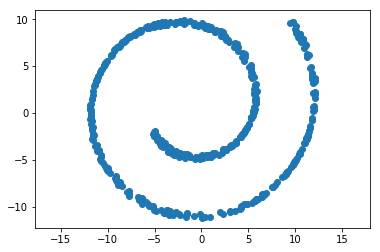

In [7]:
#MDS - SwissRoll Data Set

Y2=MDS(X2)

print(Y2.shape)
plot_Y(Y2)

(500, 2)


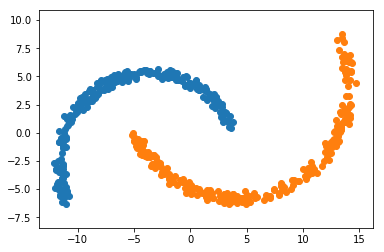

In [8]:
#MDS - Half Moon Data Set

Y3=MDS(X3)

print(Y3.shape)
plot_Y_(Y3,X3_labels)

## ISOMAP

(600, 2)


/home/aysegulbumin/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


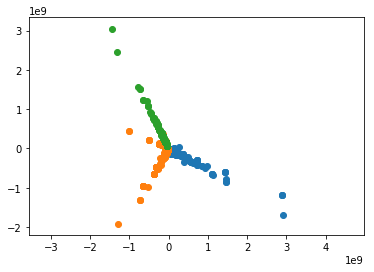

In [9]:
n_neighbors=2
Y1=ISOMAP(X1,n_neighbors)
print(Y1.shape)
plot_Y_(Y1,X1_labels)

(500, 2)


/home/aysegulbumin/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


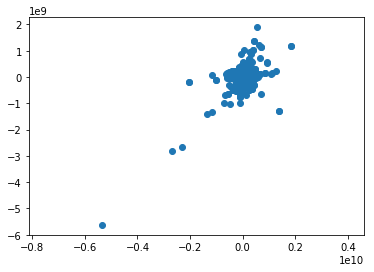

In [10]:
n_neighbors=2
Y2=ISOMAP(X2,n_neighbors)
print(Y2.shape)
plot_Y(Y2)


(500, 2)


/home/aysegulbumin/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


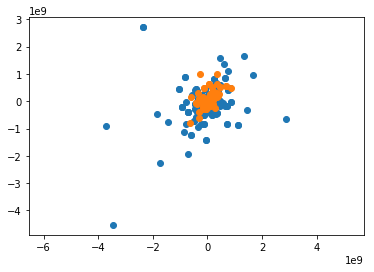

In [11]:
n_neighbors=2
Y3=ISOMAP(X3,n_neighbors)
print(Y3.shape)
plot_Y_(Y3,X3_labels)

## LLE

In [12]:
def build_Vi(indices,i):
    
    Vi=indices[i,:]
    return Vi
#def build_wi(i,n_neighbors,indices,X,lambda_):
#    Gram_i= (np.asmatrix(X[i]).T@np.asmatrix(np.ones(n_neighbors))- build_Vi(i,indices,X)).T @(np.asmatrix(X[i]).T@np.asmatrix(np.ones(n_neighbors))- build_Vi(i,indices,X))

    #print(np.asmatrix(Gram_i).shape)
    #print("Gram 0",Gram_i)
    #print(np.linalg.inv(np.asmatrix(Gram_i+np.eye(n_neighbors))).shape)
    
    #print(np.transpose(np.asmatrix(np.ones(n_neighbors))).shape)
#    w_i= lambda_* np.linalg.pinv(np.asmatrix(Gram_i))@np.transpose(np.asmatrix(np.ones(n_neighbors)))
    
#    return w_i
def build_wi(Gram_i,Vi,i,w):
        lambda_ = 1/np.sum(Gram_i)
        w[i, Vi] = lambda_*np.sum(Gram_i, axis=1)
        return w[i,Vi]
    
def LLE(X, d, n_neighbors):
    # Compute the nearest neighbors
    nbrs = NearestNeighbors(n_neighbors, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    n = X.shape[0]
    w = np.zeros((n, n))
    for i in range(n):
        # Center the neighbors matrix
        Vi = build_Vi(indices,i);
        neighbors = X[Vi, :] - X[i, :]
        
        Gram_i = np.linalg.pinv(np.dot(neighbors, neighbors.T))
        w[i, Vi]=build_wi(Gram_i,Vi,i,w)

         #w_i=build_wi(i,n_neighbors,indices,X,lambda_)
    s = np.subtract(np.eye(n), w)
    m = np.dot(np.transpose(s), s)
    eigenValues, eigenVectors = np.linalg.eigh(m)
    
    print("Eigenvectors",eigenVectors.shape)
 
    return eigenVectors[:, 1:d+1]

Eigenvectors (600, 600)


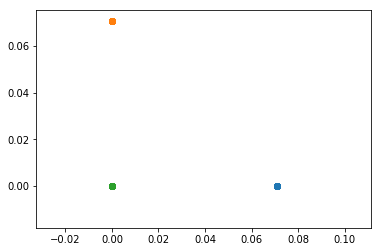

In [13]:
Y1_=LLE(X1,d=2,n_neighbors=4)
plot_Y_(Y1_,X1_labels)

Eigenvectors (500, 500)


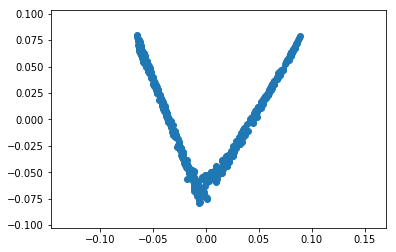

In [14]:
Y2_=LLE(X2,d=2,n_neighbors=10)
plot_Y(Y2_)

Eigenvectors (500, 500)


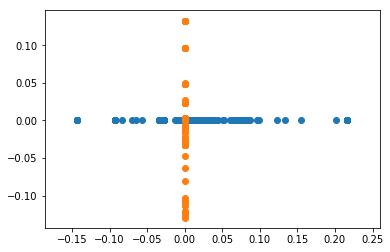

In [15]:
Y3_=LLE(X3,d=2,n_neighbors=4)
plot_Y_(Y3_,X3_labels)

# Problem 2

Using your code, project each data set down to 2-dimensions using classic MDS, ISOMAP and LLE.

Include a discussion describing whether you think MDS, ISOMAP and LLE are able to identify the intrinsic "manifold" structure of the data with an explanation of why or why not. Be sure this discussion addresses the "goal" of the data set outlined above.

1. **Clusters Data Set:** 
   **Goal:** It contains three groups of data that where each group should be classified into separate classes.

    According to the results that I get using MDS,ISOMAP and LLE;
    MDS and LLE were able to keep the 3 different cluster separable.ISOMAP was able to represent 3 clusters as well.
    LLE and MDS performed the very well, in the deducted 2D space three clusters are easily separable.
    However each cluster is represented as a point in 2D when LLE is used. If the in class variance is also important then LLE is not as good as MDS.ISOMAP could show three clusters clearly but they are not linearly separable in 2D representation I got after applying ISOMAP. If we are going to use linear method to classify then ISOMAP may not be a good option. Moreover, it is computationally expensive. It took comparably more amount of time.
    
2. **Swiss Roll Data Set:** 
   **Goal:** One group of data where neighboring points on the surface should remain neighbors after dimensionality reduction and points far on the surface should remain far from each other after dimensionality reduction.
   
   MDS performed well. In the MDS results we can directly see the swiss roll shape and the structure is kept, the points remain with the same neighbors. We are able to identify the manifold structure.
   In ISOMAP, I did not observe a particular structure similar to the swiss roll. And I think it is related to considering the neighbors. With the k values I tried I did not get as good results. I was actually expecting it to be represented as a unwrapped version of swiss roll(like a line).I cannot say that the points far from each other remained far in the reducted version   
   In LLE, I was not expecting good results for this particular example since we do update each point based on its neighbors. Every point become a totally different point based on the number of nearest neighbor selected.It might get effected by the holes in the data. As I experimented on multiple different k values, I realized the performance changed directly. As I tried with k>=10 I got a more understandable kind of unfolded version of swiss roll. So I will say that it was able to  keep the distances between the points.


3. **Half moons Data Set:** this data is 3-dimensional. **Goal:** Two groups of data that where each group should be classified into a separate class.

    MDS performed well, the two groups of data are visible and they are separable. However if we are planning to use a linear method we may not be able to separate them completely using the 2D version we got by MDS.
    
    In ISOMAP, the two groups of data are intersecting so it is definitely not a preferable dimensionality reduction considering our goals.
    
    In LLE, we can observe the two groups of data clearly this time the curvature is not there. This is also expected since the LLE uses the neighbors to "locally linearly embed" the points. So two data sets are visible. However again if we try to classify by using a linear method, a line will not be able to correctly separate two groups from each other. The problem is similar to the XOR problem discussed in the class.



## Submit your Solution

Create a PDF of the notebook with your solutions.

Submit both your notebook and the PDF of your notebook to Homework 4 assignment page on Canvas.

* For full credit consideration, make sure all output cells do not show any errors and all code is visible.